# Customer Churn Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline

In [3]:
churn_df = pd.read_csv('DATA_Customer-Churn.csv')
churn_df.columns = churn_df.columns.str.lower()
churn_df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churn_df['totalcharges'] = pd.to_numeric(churn_df['totalcharges'], errors='coerce')
churn_df['totalcharges'].fillna(churn_df['totalcharges'].mean(), inplace=True)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

Text(0.9, 0.4, '0.7346')

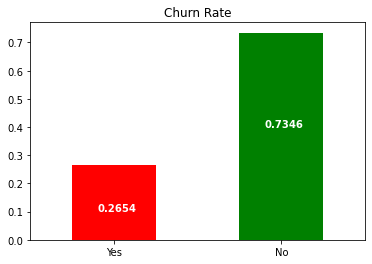

In [5]:
churn_df['churn'].value_counts(normalize=True, sort=True, ascending=True).plot.bar(rot=0, color=['Red', 'Green'])

yes = churn_df['churn'].value_counts(normalize=True).round(4)['Yes']
no = churn_df['churn'].value_counts(normalize=True).round(4)['No']

plt.title('Churn Rate')
plt.annotate(yes, xy=(0, 0.1), xytext=(-0.1, 0.1), color='white', weight='bold')
plt.annotate(no, xy=(1, 0.4), xytext=(0.9, 0.4), color='white', weight='bold')

## X/y Split

In [6]:
X = churn_df.select_dtypes('number') # selecting all the numeric columns
y = churn_df['churn'] # and the target variable columns

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [8]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_hat = log_reg.predict(X_test)

In [9]:
print(classification_report(y_test, y_hat, digits=3))  # precision can be read in the recall column

              precision    recall  f1-score   support

          No      0.818     0.922     0.867      1539
         Yes      0.683     0.449     0.542       574

    accuracy                          0.794      2113
   macro avg      0.750     0.686     0.704      2113
weighted avg      0.781     0.794     0.779      2113



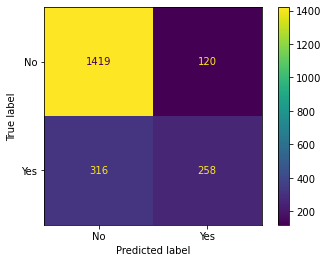

In [10]:
cm = confusion_matrix(y_test, y_hat)

disp = ConfusionMatrixDisplay(cm, display_labels=log_reg.classes_)
disp.plot()

### Overall precision is 78.1 %, the "Yes" label is 44.9% and the "No" is 92.2%.

# Decision Tree Analysis

In [14]:
dt = DecisionTreeClassifier(random_state=55)

dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

print(classification_report(y_hat, y_test, digits=3))

              precision    recall  f1-score   support

          No      0.812     0.816     0.814      1531
         Yes      0.510     0.503     0.507       582

    accuracy                          0.730      2113
   macro avg      0.661     0.660     0.661      2113
weighted avg      0.729     0.730     0.730      2113



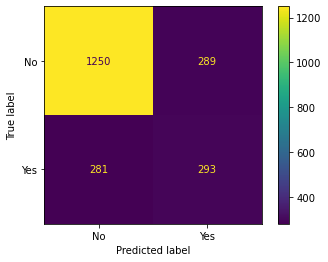

In [17]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels=dt.classes_)
disp.plot()